<a href="https://colab.research.google.com/github/binodrizal/DSIC401/blob/main/solution%20of%20HW2-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To import the data from the local drive

In [ ]:
from google.colab import files
data_to_load=files.upload()

Saving Teams.csv to Teams (1).csv


#To read CSV files 

In [ ]:
from pandas.tseries.offsets import YearBegin
data1=pd.read_csv("Teams.csv")
data1

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,2021,NL,SLN,STL,C,2,162,81.0,90,72,...,137,0.986,St. Louis Cardinals,Busch Stadium III,2102530.0,92,92,STL,SLN,SLN
2981,2021,AL,TBA,TBD,E,1,162,81.0,100,62,...,130,0.986,Tampa Bay Rays,Tropicana Field,761072.0,92,91,TBR,TBA,TBA
2982,2021,AL,TEX,TEX,W,5,162,81.0,60,102,...,146,0.986,Texas Rangers,Globe Life Field,2110258.0,99,101,TEX,TEX,TEX
2983,2021,AL,TOR,TOR,E,4,162,80.0,91,71,...,122,0.984,Toronto Blue Jays,Sahlen Field,805901.0,102,101,TOR,TOR,TOR


#Solution of 1(a)

In [ ]:
data_1a=data1[(data1["yearID"]>=2000)&(data1["yearID"]<=2009)]
sol_1a=data_1a[["yearID","W","L"]]
sol_1a

,yearID,W,L
2325,2000,82,80
2326,2000,85,77
2327,2000,95,67
2328,2000,74,88
2329,2000,85,77
...,...,...,...
2620,2009,91,71
2621,2009,84,78
2622,2009,87,75
2623,2009,75,87


#Solution of 1(b)

In [ ]:
data_chn=data1.loc[data1["teamID"]=="CHN"]
data_chn.dropna(subset=['HR']).groupby("yearID").sum("HR")
data_chn[["yearID","HR"]].loc[data_chn["HR"]>200].count()



yearID    6
HR        6
dtype: int64

#solution of 1(c)

In [ ]:
data1["presid_term"]=pd.cut(data1["yearID"],(np.arange(1871,2022,4)))
data_c=data1[["presid_term","yearID","HR"]].dropna()
sol_c=data_c.groupby(["presid_term"])["HR"].agg([sum]).sort_values("sum", ascending=False).iloc[0]
sol_c




sum    24076
Name: (2015, 2019], dtype: int64

#Solution of 1(d)

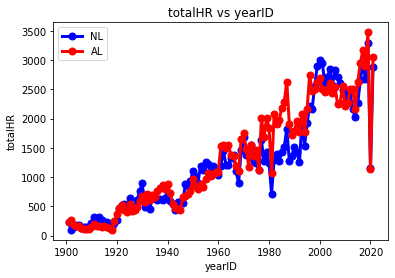

In [82]:
data_1d=data1[["yearID", "HR", "lgID"]].dropna()
sol_1d=data_1d.groupby(["yearID","lgID"])["HR"].agg([sum])
df=sol_1d.pivot_table(index="yearID", values="sum", columns="lgID")
df1=df.drop(["AA","FL","PL","UA"], axis=1).dropna()
df2=df1.reset_index()
plt.plot(df2.yearID,df2.NL,'b-o',label="NL",linewidth=3,markersize=7)
plt.plot(df2.yearID,df2.AL,'r-o',label="AL",linewidth=3,markersize=7)
plt.xlabel("yearID")
plt.ylabel("totalHR")
plt.title("totalHR vs yearID")
plt.legend()
plt.show()

#Solution of 1(e)

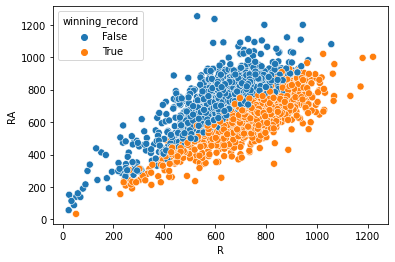

In [131]:
data_1e=data1[["yearID","W","L","R","RA"]].dropna()
data_1e["winning_record"]=(data_1e["W"]-data_1e["L"])>0
sns.scatterplot(x="R",y="RA", hue="winning_record",data=data_1e,markers=["o","^"], s=50)
plt.show()